### POKEMON CLASSIFICATION USING NEURAL NETWORK

In [ ]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

### DATASET LINK : https://www.kaggle.com/thedagger/pokemon-generation-one`

In [38]:
p = Path("./datasetpok/")
print(p)
dirs = p.glob("*")

image_data = []
labels = []
# one optional
image_path = []

# make label_dict
label_dict = {}
dict_to_label = {}
count = 0
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    labels.append(label)
    label_dict[label] = count
    dict_to_label[count] = label
    count += 1
print(label_dict)

datasetpok
{'Abra': 0, 'Aerodactyl': 1, 'Alakazam': 2, 'Arbok': 3, 'Arcanine': 4, 'Articuno': 5, 'Beedrill': 6, 'Bellsprout': 7, 'Blastoise': 8, 'Bulbasaur': 9, 'Butterfree': 10, 'Caterpie': 11, 'Chansey': 12, 'Charizard': 13, 'Charmander': 14, 'Charmeleon': 15, 'Clefable': 16, 'Clefairy': 17, 'Cloyster': 18, 'Cubone': 19, 'dataset': 20, 'Dewgong': 21, 'Diglett': 22, 'Ditto': 23, 'Dodrio': 24, 'Doduo': 25, 'Dragonair': 26, 'Dragonite': 27, 'Dratini': 28, 'Drowzee': 29, 'Dugtrio': 30, 'Eevee': 31, 'Ekans': 32, 'Electabuzz': 33, 'Electrode': 34, 'Exeggcute': 35, 'Exeggutor': 36, 'Farfetchd': 37, 'Fearow': 38, 'Flareon': 39, 'Gastly': 40, 'Gengar': 41, 'Geodude': 42, 'Gloom': 43, 'Golbat': 44, 'Goldeen': 45, 'Golduck': 46, 'Golem': 47, 'Graveler': 48, 'Grimer': 49, 'Growlithe': 50, 'Gyarados': 51, 'Haunter': 52, 'Hitmonchan': 53, 'Hitmonlee': 54, 'Horsea': 55, 'Hypno': 56, 'Ivysaur': 57, 'Jigglypuff': 58, 'Jolteon': 59, 'Jynx': 60, 'Kabuto': 61, 'Kabutops': 62, 'Kadabra': 63, 'Kakuna': 64

In [3]:
# iterating through all folder
dirs = p.glob("*")
print(dirs)
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    cnt = 0
    print(folder_dir)
    # iterate over all images
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt += 1 
    print(cnt)
        

<generator object Path.glob at 0x0000026483CED138>
datasetpok\Abra
41
datasetpok\Aerodactyl
97
datasetpok\Alakazam
48
datasetpok\Arbok
63
datasetpok\Arcanine
61
datasetpok\Articuno
56
datasetpok\Beedrill
53
datasetpok\Bellsprout
55
datasetpok\Blastoise
61
datasetpok\Bulbasaur
176
datasetpok\Butterfree
66
datasetpok\Caterpie
49
datasetpok\Chansey
57
datasetpok\Charizard
52
datasetpok\Charmander
200
datasetpok\Charmeleon
65
datasetpok\Clefable
49
datasetpok\Clefairy
59
datasetpok\Cloyster
59
datasetpok\Cubone
58
datasetpok\dataset
0
datasetpok\Dewgong
66
datasetpok\Diglett
51
datasetpok\Ditto
48
datasetpok\Dodrio
65
datasetpok\Doduo
48
datasetpok\Dragonair
65
datasetpok\Dragonite
62
datasetpok\Dratini
107
datasetpok\Drowzee
60
datasetpok\Dugtrio
64
datasetpok\Eevee
41
datasetpok\Ekans
51
datasetpok\Electabuzz
53
datasetpok\Electrode
67
datasetpok\Exeggcute
57
datasetpok\Exeggutor
67
datasetpok\Farfetchd
64
datasetpok\Fearow
122
datasetpok\Flareon
59
datasetpok\Gastly
50
datasetpok\Gengar

### VISUALIZING DATASET

In [4]:
import numpy as np

In [5]:
print(len(image_data))
print(len(labels))

10120
10120


In [6]:
import random
random.seed(10)

In [7]:
X = np.array(image_data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
# Normalization
X = X/255.0

(10120, 40, 40, 3)
(10120,)


In [8]:
def drawImg(img,labels):
    plt.title(dict_to_label[labels])
    plt.imshow(img)
    plt.show()

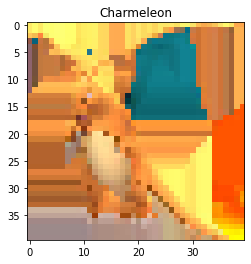

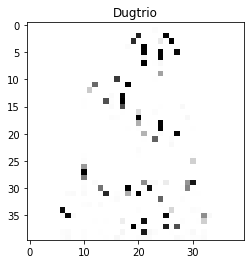

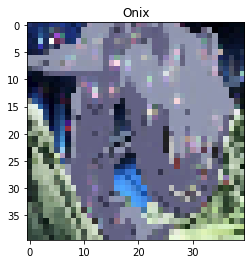

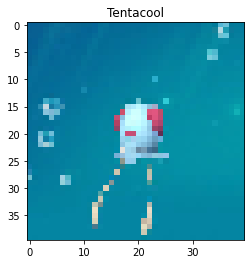

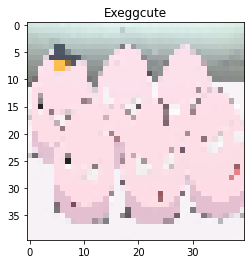

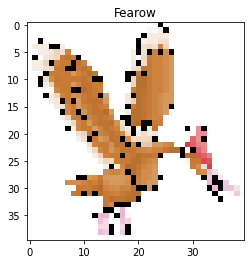

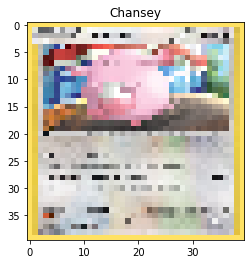

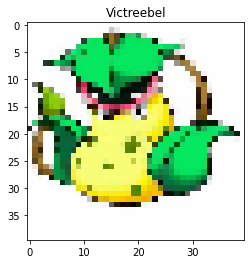

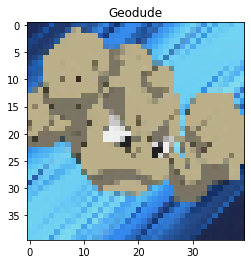

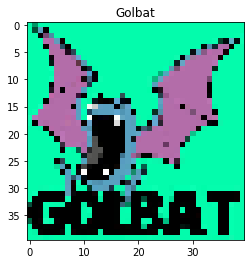

In [9]:
for i in range(10):
    r = np.random.randint(400)
    drawImg(X[r].reshape(40,40,3),Y[r])

### SPLITTING TRAIN_TESTING

In [10]:
split = int(X.shape[0]*0.8)
Xhat = np.array(X)
Yhat = np.array(Y)

# Train set
X = Xhat[:split,:]
Y = Yhat[:split]

# Test set
Xtest = Xhat[split:,:]
Ytest = Yhat[split:]

print(X.shape,Y.shape)
print(Xtest.shape,Ytest.shape)

(8096, 40, 40, 3) (8096,)
(2024, 40, 40, 3) (2024,)


In [11]:
def softmax(a):
    epa = np.exp(a)
    ans = epa/np.sum(epa,axis=1,keepdims=True)
    return ans

In [12]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        # first layers
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        # second layers
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        # third layers
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        # Applying gradient descdent 
        self.model['W1'] -= learning_rate*dw1
        self.model['b1'] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)

In [13]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def onehot(y,depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht

In [14]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 150
    Y_OHT = onehot(Y,classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss

In [15]:
model = NeuralNetwork(input_size=4800,layers=[300,200],output_size=150)

In [16]:
print(X.shape)

(8096, 40, 40, 3)


In [17]:
X = X.reshape(X.shape[0],-1)
Xtest = Xtest.reshape(Xtest.shape[0],-1)

In [18]:
l = train(X,Y,model,1000,0.0001)

Epoch 0 Loss 0.2517
Epoch 50 Loss 0.0422
Epoch 100 Loss 0.0364
Epoch 150 Loss 0.0333
Epoch 200 Loss 0.0315
Epoch 250 Loss 0.0306
Epoch 300 Loss 0.0300
Epoch 350 Loss 0.0295
Epoch 400 Loss 0.0291
Epoch 450 Loss 0.0287
Epoch 500 Loss 0.0284
Epoch 550 Loss 0.0282
Epoch 600 Loss 0.0279
Epoch 650 Loss 0.0277
Epoch 700 Loss 0.0276
Epoch 750 Loss 0.0274
Epoch 800 Loss 0.0273
Epoch 850 Loss 0.0271
Epoch 900 Loss 0.0270
Epoch 950 Loss 0.0269


# visualize

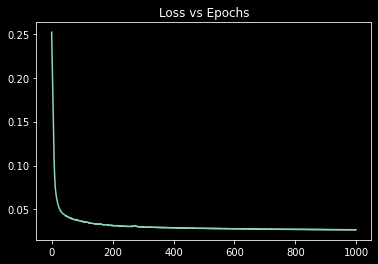

In [19]:
plt.style.use("dark_background")
plt.title("Loss vs Epochs")
plt.plot(l)
plt.show()

In [26]:
def getaccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc

print("Training Accuracy %.4f"%(getaccuracy(X,Y,model)*100))
print("Testing Accuracy %.4f"%(getaccuracy(Xtest,Ytest,model)*100))

Training Accuracy 19.8493
Testing Accuracy 2.8162


### WAYS TO HANDLE OVERFITIING DATA
- Dropouts
- Early stopping (we make parallely a validation set and stop when validation accuray is minimum)
- we will use keras for validation set visualization

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [37]:
outputs = model.predict(X)
cnf_matrix =  confusion_matrix(Y,outputs)
print(classification_report(Y,outputs))
print(cnf_matrix)

              precision    recall  f1-score   support

           0       0.89      0.26      0.40        31
           1       0.96      0.56      0.70        79
           2       0.77      0.26      0.38        39
           3       0.73      0.16      0.26        50
           4       0.43      0.13      0.20        47
           5       0.73      0.22      0.34        49
           6       0.70      0.18      0.29        38
           7       1.00      0.19      0.31        43
           8       0.73      0.15      0.25        53
           9       0.21      0.15      0.17       141
          10       0.38      0.10      0.16        58
          11       1.00      0.20      0.33        40
          12       0.67      0.09      0.16        45
          13       0.57      0.30      0.39        44
          14       0.03      0.96      0.05       163
          15       0.57      0.08      0.13        53
          16       1.00      0.17      0.29        35
          17       0.11    

Confusion matrix, without normalization
[[ 8  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0  7]]


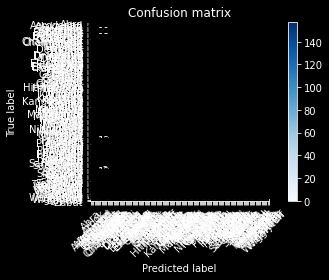

In [39]:
plot_confusion_matrix(cnf_matrix,classes=labels)